# Describing Distributions

## Task:
In this assignment, you will be analyzing & visualizing several features in the Medical Dataset.

The features to analyze: 
- VitD_levels
- Doc_visits
- TotalCharge


For each feature listed:

1. Plot a histogram with a kde (kernel density estimate)
  - Add a line for the mean (red)
  - Add a line for the median (green)
  - Add a line for for +1 std from the mean (black)
  - Add a line for the - 1 std from the mean (black)
  - Highlight the range between +1 and =1 std (yellow)
2. Answer the following questions:
  - Is it Discrete or Continuous?
  - Does it have a skew? If so, which direction (+/-)
  - What type of kurtosis does it display? (Mesokurtic, Leptokurtic, Platykurtic)

### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

### Uploading Data

In [2]:
#import file
df = pd.read_csv("Data/data.csv", low_memory = False)
df.head()

,State,Lat,Lng,Area,Children,Age,Income,Marital,Gender,ReAdmis,...,Hyperlipidemia,BackPain,Anxiety,Allergic_rhinitis,Reflux_esophagitis,Asthma,Services,Initial_days,TotalCharge,Additional_charges
0,AL,34.34960,-86.72508,Suburban,1.0,53,86575.93,Divorced,Male,0,...,0.0,1.0,1.0,1.0,0,1,Blood Work,10.585770,3726.702860,17939.403420
1,FL,30.84513,-85.22907,Urban,3.0,51,46805.99,Married,Female,0,...,0.0,0.0,0.0,0.0,1,0,Intravenous,15.129562,4193.190458,17612.998120
2,SD,43.54321,-96.63772,Suburban,3.0,53,14370.14,Widowed,Female,0,...,0.0,0.0,0.0,0.0,0,0,Blood Work,4.772177,2434.234222,17505.192460
3,MN,43.89744,-93.51479,Suburban,0.0,78,39741.49,Married,Male,0,...,0.0,0.0,0.0,0.0,1,1,Blood Work,1.714879,2127.830423,12993.437350
4,VA,37.59894,-76.88958,Rural,1.0,22,1209.56,Widowed,Female,0,...,1.0,0.0,0.0,1.0,0,0,CT Scan,1.254807,2113.073274,3716.525786


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 32 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   State               995 non-null    object 
 1   Lat                 1000 non-null   float64
 2   Lng                 1000 non-null   float64
 3   Area                995 non-null    object 
 4   Children            993 non-null    float64
 5   Age                 1000 non-null   int64  
 6   Income              1000 non-null   float64
 7   Marital             995 non-null    object 
 8   Gender              995 non-null    object 
 9   ReAdmis             1000 non-null   int64  
 10  VitD_levels         1000 non-null   float64
 11  Doc_visits          1000 non-null   int64  
 12  Full_meals_eaten    1000 non-null   int64  
 13  vitD_supp           1000 non-null   int64  
 14  Soft_drink          1000 non-null   int64  
 15  Initial_admin       995 non-null    object 
 16  HighBlo

### VitD_levels

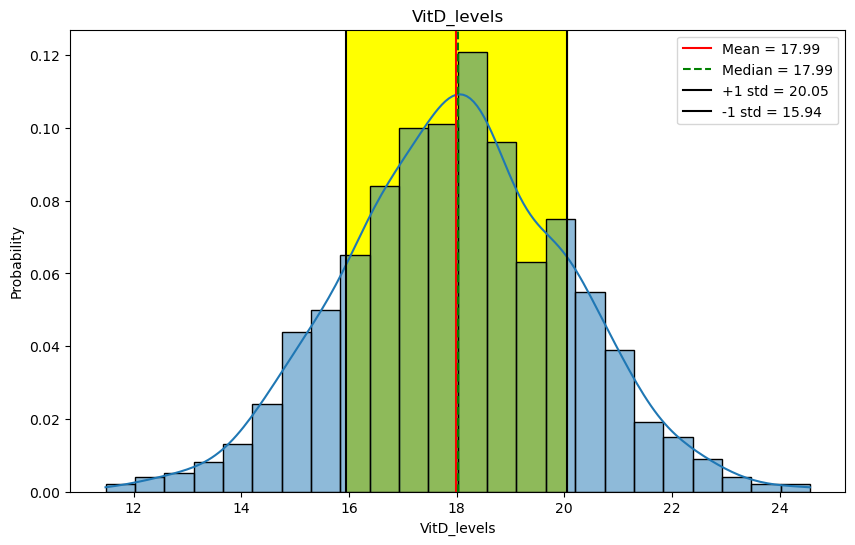

In [4]:
col = 'VitD_levels'
feature = df[col]
mean = feature.mean()
median = feature.median()
std = feature.std()
plus_one_std = mean + std
minus_one_std = mean - std
fig,ax = plt.subplots(figsize=(10,6))
sns.histplot(feature ,ax=ax,stat='probability',kde=True)
ax.axvline(mean,color = 'red', label=f'Mean = {mean:,.2f}',)
ax.axvline(median,color = 'green', label=f'Median = {mean:,.2f}',ls='--')
ax.axvline(plus_one_std, color = 'k',label=f'+1 std = {plus_one_std:,.2f}')
ax.axvline(minus_one_std, color = 'k', label = f'-1 std = {minus_one_std:,.2f}')
ax.axvspan(plus_one_std, minus_one_std, color = 'yellow', zorder = 0)
ax.set_title(f'{col}')
ax.legend();

This graph is continuous and has a normal skew (no skew).

In [5]:
stats.normaltest(df[col])

NormaltestResult(statistic=0.039721627680133466, pvalue=0.9803351128910952)

In [6]:
#Mesokurtic (Kurtosis ~3)
#Leptokurtic (Kurtosis >3)     
#Platykurtic (Kurtosis < 3)

from scipy import stats
kurt = stats.kurtosis(df[col], fisher = False)
print(kurt)
if kurt == 3:
  print('Mesokurtic')
elif kurt > 3:
  print('Leptokurtic')
else:
  print('Patykurtic')

3.013147515833447
Leptokurtic


### Doc_visits

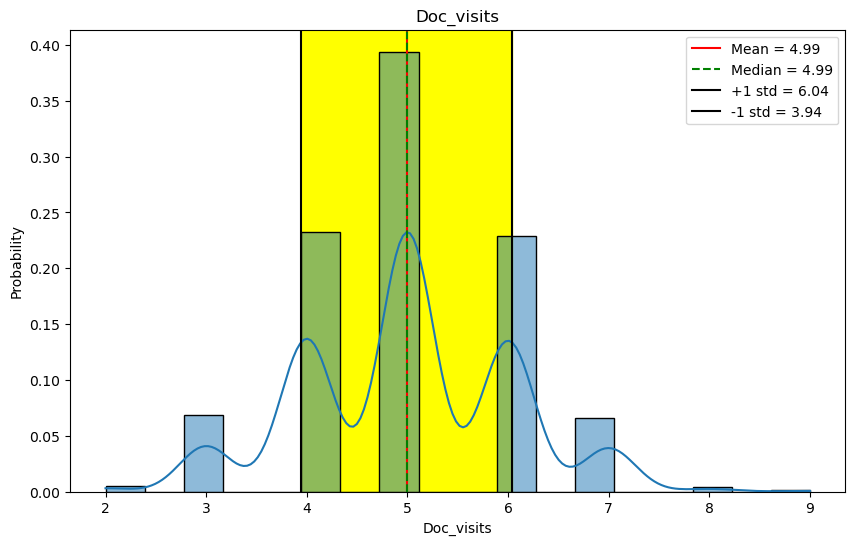

In [7]:
col = 'Doc_visits'
feature = df[col]
mean = feature.mean()
median = feature.median()
std = feature.std()
plus_one_std = mean + std
minus_one_std = mean - std
fig,ax = plt.subplots(figsize=(10,6))
sns.histplot(feature ,ax=ax,stat='probability',kde=True)
ax.axvline(mean,color = 'red', label=f'Mean = {mean:,.2f}',)
ax.axvline(median,color = 'green', label=f'Median = {mean:,.2f}',ls='--')
ax.axvline(plus_one_std, color = 'k',label=f'+1 std = {plus_one_std:,.2f}')
ax.axvline(minus_one_std, color = 'k', label = f'-1 std = {minus_one_std:,.2f}')
ax.axvspan(plus_one_std, minus_one_std, color = 'yellow', zorder = 0)
ax.set_title(f'{col}')
ax.legend();

In [8]:
stats.normaltest(df[col])

NormaltestResult(statistic=0.17258400399640103, pvalue=0.9173263309867027)

This graph is discreet and has a nomarl skew(no skew).

In [9]:
#Mesokurtic (Kurtosis ~3)
#Leptokurtic (Kurtosis >3)     
#Platykurtic (Kurtosis < 3)

from scipy import stats
kurt = stats.kurtosis(df[col], fisher = False)
print(kurt)
if kurt == 3:
  print('Mesokurtic')
elif kurt > 3:
  print('Leptokurtic')
else:
  print('Patykurtic')

2.9919958083381206
Patykurtic


### TotalCharge

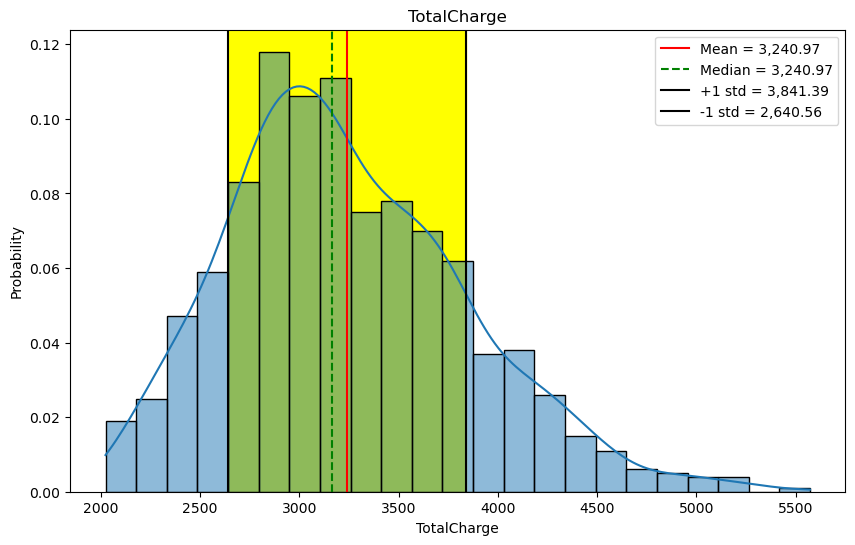

In [10]:
col = 'TotalCharge'
feature = df[col]
mean = feature.mean()
median = feature.median()
std = feature.std()
plus_one_std = mean + std
minus_one_std = mean - std
fig,ax = plt.subplots(figsize=(10,6))
sns.histplot(feature ,ax=ax,stat='probability',kde=True)
ax.axvline(mean,color = 'red', label=f'Mean = {mean:,.2f}',)
ax.axvline(median,color = 'green', label=f'Median = {mean:,.2f}',ls='--')
ax.axvline(plus_one_std, color = 'k',label=f'+1 std = {plus_one_std:,.2f}')
ax.axvline(minus_one_std, color = 'k', label = f'-1 std = {minus_one_std:,.2f}')
ax.axvspan(plus_one_std, minus_one_std, color = 'yellow', zorder = 0)
ax.set_title(f'{col}')
ax.legend();

This graph is continuos and has a positive skew.

In [11]:
stats.normaltest(df[col])

NormaltestResult(statistic=52.72154516973212, pvalue=3.5617376548081327e-12)

In [12]:
#Mesokurtic (Kurtosis ~3)
#Leptokurtic (Kurtosis >3)     
#Platykurtic (Kurtosis < 3)
print(kurt)
from scipy import stats
kurt = stats.kurtosis(df[col], fisher = False)

if kurt == 3:
  print('Mesokurtic')
elif kurt > 3:
  print('Leptokurtic')
else:
  print('Patykurtic')

2.9919958083381206
Leptokurtic
